In [2]:
from IPython.core.display import display, HTML
display(HTML('<style>.container {width:100% !important;}</style>'))

In [1]:
import numpy as np
pos_v = np.load('datasets/cc/pos_combined_feb9.npy')
pos_v.shape,pos_v.max()

((3008, 1, 100, 100), 1.0000000000000002)

In [1]:

'''
Load the datasets for each clas from their numpy files and concatenate them and shuffle. 
The one-hot-encoded labels are shuffled in the exact same arrangement.
'''
import numpy as np

#load numpy binaries\
# pos = np.load('datasets/cc/pos_jan21.npy')[:7192] #positive set is already shuffled
# neg = np.load('datasets/cc/neg7192.npy')[:7192/2] #only load half 
# crowded =np.load('datasets/cc/crowded7192.npy')[:7192/2]

pos = np.load('datasets/cc/pos_jan21.npy')[:12000] #14k in each class
neg = np.load('datasets/neg_shuf.npy')[:6000]
crowded =np.load('datasets/crowded_shuf.npy')[:6000]


# pos_v = np.load('datasets/cc/pos_val_jan26.npy') [:7192]
# neg_v = np.load('datasets/cc/neg7192_val.npy')[:7192/2]
# crowded_v =np.load('datasets/cc/crowded7192_val.npy')[:7192/2]

pos_v = np.load('datasets/cc/pos_val_jan26.npy')[:2500] #4000
neg_v = np.load('datasets/neg_shuf.npy')[12000:] #2000
crowded_v =np.load('datasets/crowded_shuf.npy')[12000:] #2000
# pos_v = np.load('datasets/cc/pos_combined_feb9.npy')[:2500] #same validation set as binary
# neg_v = np.load('datasets/cc/neg_val_feb9.npy')
# crowded_v =np.load('datasets/cc/crowded_val_feb9.npy')

neg = np.concatenate(( neg, crowded))
neg_v = np.concatenate(( neg_v, crowded_v))


#one-hot-encode
py =np.ones((pos.shape[0],1))
for i in range(py.shape[0]): py[i] =[1,]
ny =np.ones((neg.shape[0],1))
for i in range(ny.shape[0]): ny[i] =[0]

py_v =np.ones((pos_v.shape[0],1))
for i in range(py_v.shape[0]): py_v[i] =[1,]
ny_v =np.ones((neg_v.shape[0],1))
for i in range(ny_v.shape[0]): ny_v[i] =[0]


#concat the data sets into features and labels
x_combined =np.concatenate((pos, neg))#, paper_pos, paper_neg))#, multisource))
y_combined =np.concatenate((py, ny))#, ppy, pny))#, my)) 

x_combined_v =np.concatenate((pos_v, neg_v))#, paper_pos, paper_neg))#, multisource))
y_combined_v =np.concatenate((py_v, ny_v))#, ppy, pny))#, my)) 

#shuffle the data sets
# s3 = np.arange(x_combined.shape[0])
# np.random.shuffle(s3)
# x_combined_shuf =x_combined[s3]
# y_combined_shuf = y_combined[s3]

s3 = np.arange(x_combined.shape[0])
np.random.shuffle(s3)
x_combined =x_combined[s3]
y_combined = y_combined[s3]

In [1]:

'''
Load the datasets for each clas from their numpy files and concatenate them and shuffle. 
The one-hot-encoded labels are shuffled in the exact same arrangement.
'''
import numpy as np


pos = np.load('datasets/cc/pos_jan21.npy')[:12000-2000]#[:12000-2128] #14k in each class
neg = np.load('datasets/neg_shuf.npy')[:6000]
crowded =np.load('datasets/crowded_shuf.npy')[:6000]

'''-------------'''
from IPython import display
from astropy.visualization import (ZScaleInterval, ImageNormalize)
from sklearn.preprocessing import minmax_scale
import os 
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
PATH = "/home/robbie/repos/HSTLens/CC_batch_processing/batchjob_3/datasets/cc/augmented_real_no_orig/"#HSTLens_detections/"

l= os.listdir(PATH)

pos_v = np.zeros((len(l),1,100,100))
count=0
fails=0
for filename in l:
    
    try:  
        data, hdr = fits.getdata(PATH + filename, 0,header=True) #'sci' image[1] data and header
        
        tmp_image = np.nan_to_num(data).reshape(-1,)                    
        tmp_image = minmax_scale(tmp_image, feature_range = (0,1))
        data = tmp_image.reshape(1,100,100) 
        pos_v[count]=data
       

      
    except:
        fails+=1
        print("skipped due to non-existent image, or conversion error")
        
        
    count+=1
    
s3 = np.arange(pos_v.shape[0])#shuffle it
np.random.shuffle(s3)
pos_v =pos_v[s3]
'''-------------'''

neg_v = np.load('datasets/neg_shuf.npy')[12000:13000] #2000
crowded_v =np.load('datasets/crowded_shuf.npy')[12000:13000] #2000

pos = np.concatenate(( pos, pos_v[:2000]))#add reals to trainign set
neg = np.concatenate(( neg, crowded))
neg_v = np.concatenate(( neg_v, crowded_v))


#one-hot-encode
py =np.ones((pos.shape[0],1))
for i in range(py.shape[0]): py[i] =[1,]
ny =np.ones((neg.shape[0],1))
for i in range(ny.shape[0]): ny[i] =[0]

py_v =np.ones((pos_v.shape[0],1))
for i in range(py_v.shape[0]): py_v[i] =[1,]
ny_v =np.ones((neg_v.shape[0],1))
for i in range(ny_v.shape[0]): ny_v[i] =[0]


#concat the data sets into features and labels
x_combined =np.concatenate((pos, neg))#, paper_pos, paper_neg))#, multisource))
y_combined =np.concatenate((py, ny))#, ppy, pny))#, my)) 

x_combined_v =np.concatenate((pos_v[2000:], neg_v))#, paper_pos, paper_neg))#, multisource))
y_combined_v =np.concatenate((py_v[2000:], ny_v))#, ppy, pny))#, my)) 


s3 = np.arange(x_combined.shape[0])
np.random.shuffle(s3)
x_combined =x_combined[s3]
y_combined = y_combined[s3]

/home/robbie/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype >f8 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


In [2]:
'''
Load the model files, build architecture, train and sav weights. Save all samples after 50000 for validation.
It might be better ot keep a set completely seperate for validation. 
'''

from HSTLens_resnet_2class_arch12 import deeplens_classifier

my_model = deeplens_classifier(n_epochs=30, batch_size=32)
my_model._build() 
val=[x_combined_v,y_combined_v]
my_model._fit(x_combined,y_combined, val)

# my_model.model.save("weights/3_class_weights") # issue with json serializing
my_model.model.save_weights("test!!!")
# my_model.model.load_weights("multiclass4_ensemble_1")


Using TensorFlow backend.


building arch 11
arch 12
...Fitting model ...
Train on 24000 samples, validate on 7268 samples
Epoch 1/30
 2464/24000 [==>...........................] - ETA: 58s - loss: 0.7269 - acc: 0.6144

KeyboardInterrupt: 

In [4]:
#build and load weights
from HSTLens_resnet_2class_arch12 import deeplens_classifier

my_model = deeplens_classifier(n_epochs=8, batch_size=32)
my_model._build() 
my_model.model.load_weights('/home/robbie/repos/HSTLens/CC_batch_processing/batchjob_3/weights/2arch12_25/epoch_weights00000007.h5')#("weights/2_class_weights_dim")


building arch 11
arch 12


/home/robbie/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


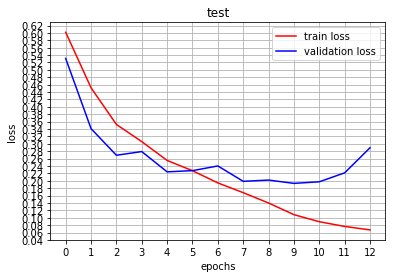

In [3]:
#plot the loss vs epochs
#my_model.model.history is a callback obj my_model.model.history is a dict
import matplotlib.pyplot as plt
train_loss = my_model.model.history.history['loss'] 
val_loss = my_model.model.history.history['val_loss']

ep=13
xc = range(ep)

plt.figure()
plt.title('test')
plt.xlabel('epochs');
plt.ylabel('loss')
plt.xticks(np.arange(0, ep, step=1))
plt.yticks(np.arange(0, 1, step=0.02))

plt.plot(xc, train_loss,'r-',label="train loss")
plt.plot(xc, val_loss, 'b-',label="validation loss")
plt.grid('on')
plt.legend()

...Generating Predictions ...


Text(0,0.5,'Percentage of Rankings')

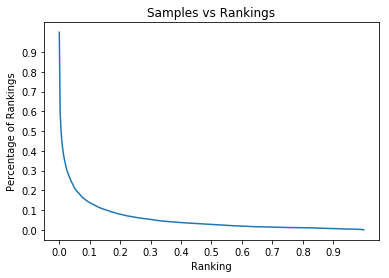

In [48]:

#quickly get predicitons using 1 model only
import numpy as np
from sklearn.preprocessing import minmax_scale

test_set = np.load('datasets/cc/test_set.npy')

for i in range(len(test_set)):
    
    tmp_image = test_set[i].reshape(-1,)                    
    tmp_image = minmax_scale(tmp_image, feature_range = (0,1))
    test_set[i] = tmp_image.reshape(1,100,100) 


predictions  = my_model._predict(test_set, y= None, discrete = False)

new = np.zeros((10000,1))
for i in range(len(new)):
    new[i][0]=  predictions[i][0]
    
import pandas as pd
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.nddata.utils import Cutout2D
import numpy as np
import os 
import time
lens=new

x_axis = np.linspace(0,1, num=350)
tens_list = [lens]
for i in range(len(x_axis-1)):
    tens_list.append([])
    
    
def work(element,limit):
    for probability in (tens_list[element]): #check the previous percentage bin
        if probability>limit:
            tens_list[element+1].append(probability)
    return len(tens_list[element+1])

y_axis =[]
for i in range(len(x_axis-1)):
    y_axis.append(work(i,x_axis[i]))

plt.plot(x_axis[0:],np.array(y_axis[0:]).astype(float)/y_axis[0])
plt.title('Samples vs Rankings')
plt.yticks(np.arange(0,1, 0.1))
plt.xticks(np.arange(0,1, 0.1))
plt.xlabel('Ranking')
plt.ylabel('Percentage of Rankings')

In [60]:
a= np.array(y_axis[0:]).astype(float)/y_axis[0]
i=283


a[i],x_axis[i]

(0.010937186433875175, 0.8108882521489971)

In [13]:
# closer inspection
from IPython import display
from astropy.visualization import (ZScaleInterval, ImageNormalize)
from sklearn.preprocessing import minmax_scale
import os 
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
PATH = "/home/robbie/repos/HSTLens/CC_batch_processing/batchjob_3/out/"#HSTLens_detections/"
# PATH ="/home/robbie/repos/HSTLens/CC_batch_processing/batchjob_3/augmented_real133/"# 

l= os.listdir(PATH)

ims = np.zeros((len(l),1,100,100))
count=0
fails=0
for filename in l:
    
    try:  
        data, hdr = fits.getdata(PATH + filename, 0,header=True) #'sci' image[1] data and header
        
        tmp_image = np.nan_to_num(data).reshape(-1,)                    
        tmp_image = minmax_scale(tmp_image, feature_range = (0,1))
        data = tmp_image.reshape(1,100,100) 
        ims[count]=data
       

      
    except:
        fails+=1
        print("skipped due to non-existent image, or conversion error")
        
        
    count+=1

print('fails '+str(fails))



#######-----------------

predictions  = my_model._predict(ims, y= None, discrete = False)
new = np.zeros((predictions.shape[0],1))
for i in range(len(new)):
    new[i][0]=  predictions[i][0]

/home/robbie/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype >f4 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


fails 0
...Generating Predictions ...


In [11]:
# closer inspection
from IPython import display
from astropy.visualization import (ZScaleInterval, ImageNormalize)
from sklearn.preprocessing import minmax_scale
import os 
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

pos_v = np.load('datasets/cc/pos_combined_feb9.npy')

predictions  = my_model._predict(pos_v, y= None, discrete = False)
new = np.zeros((predictions.shape[0],1))
for i in range(len(new)):
    new[i][0]=  predictions[i][0]

...Generating Predictions ...


In [12]:
count=0
for i in range(len(new)):
    if new[i]> 0.8260869565217391:
        count+=1
        
print float(count)
print float(count)/predictions.shape[0]

2326.0
0.773271276596


In [66]:
tol= 0.001
desired_comp=0.95
curr_comp=0
boundary=0.5
prev_boundary=0
while(abs(curr_comp-desired_comp)<tol):
    count=0
    for i in range(len(new)):
        if new[i]> boundary:
            count+=1
    curr_comp = float(count)/predictions.shape[0]
    
    if curr_comp<desired_comp:
        prev_boundary = boundary
        boundary=boundary+ (1.0-boundary)/2
    else:
        tmp = boundary
        boundary=prev_boundary+ (boundry-prev_boundary)/2
        prev_boundary=tmp
print boundary   

0.5


In [18]:
#rotate the positive TR 90 degrees to make validation

import matplotlib.pyplot as plt
import numpy as np 
ims = np.load('datasets/cc/pos_jan21.npy')


for i in range(len(ims)):
    ims[i][0]= np.rot90(ims[i][0])
    

np.save('/home/robbie/repos/HSTLens/CC_batch_processing/batchjob_3/datasets/cc/pos_jan21_rot90',ims)

# ims = np.load('datasets/cc/pos_jan21.npy')
# plt.imshow(ims[0][0])

# ims = np.load('datasets/cc/pos_jan21_rot90.npy')
# plt.imshow(ims[0][0])

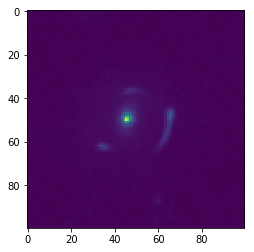

In [386]:
plt.imshow(pos_v[1013][0])

***

# getting ROC curves with common thresholds.


In [70]:
#build and load weights
from HSTLens_resnet_2class_arch12 import deeplens_classifier

my_model = deeplens_classifier(n_epochs=8, batch_size=32)
my_model._build() 
my_model.model.load_weights(
    '/home/robbie/repos/HSTLens/CC_batch_processing/batchjob_3/weights/2arch12_20/epoch_weights00000006.h5')#("weights/2_class_weights_dim")


building arch 11
arch 12


In [42]:
from sklearn.preprocessing import minmax_scale
import os 
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import numpy as np
from sklearn.preprocessing import minmax_scale

test_set = np.load('datasets/cc/test_set.npy')
for i in range(len(test_set)):
    
    tmp_image = test_set[i].reshape(-1,)                    
    tmp_image = minmax_scale(tmp_image, feature_range = (0,1))
    test_set[i] = tmp_image.reshape(1,100,100) 
    
predictions_neg  = my_model._predict(test_set, y= None, discrete = False)


# pos_v = np.load('datasets/cc/pos_combined_feb9.npy')

PATH = "/home/robbie/repos/HSTLens/CC_batch_processing/batchjob_3/out/"#HSTLens_detections/"
l= os.listdir(PATH)
pos_v = np.zeros((len(l),1,100,100))
count =0
for filename in l:
    try:  
        data, hdr = fits.getdata(PATH + filename, 0,header=True) #'sci' image[1] data and header
        
        tmp_image = np.nan_to_num(data).reshape(-1,)                    
        tmp_image = minmax_scale(tmp_image, feature_range = (0,1))
        data = tmp_image.reshape(1,100,100) 
        pos_v[count]=data
    except:
        print("skipped due to non-existent image, or conversion error")
    count+=1
    
predictions_pos  = my_model._predict(pos_v, y= None, discrete = False)

neg_len = predictions_neg.shape[0]
pos_len = predictions_pos.shape[0]

predictions_combined = np.zeros((neg_len+pos_len,))
labels_combined = np.zeros((neg_len+pos_len,))

for i in range(neg_len):
    predictions_combined[i]=  predictions_neg[i][0]
    
for i in range(pos_len):
    predictions_combined[neg_len+i] =  predictions_pos[i][0]
    labels_combined[neg_len+i] = 1
    
predictions_neg.shape, predictions_combined.shape  

SyntaxError: invalid syntax (<ipython-input-42-e8226c3ef6bd>, line 52)

In [47]:
#for testing on the new candidates
from sklearn.preprocessing import minmax_scale
import os 
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import numpy as np
from sklearn.preprocessing import minmax_scale


PATH ='/home/robbie/repos/HSTLens/make_simulations/new_candidates/'
l= os.listdir(PATH)
pos_v = np.zeros((len(l),1,100,100))
count =0
for filename in l:
    try:  
        data, hdr = fits.getdata(PATH + filename, 0,header=True) #'sci' image[1] data and header
        
        tmp_image = np.nan_to_num(data).reshape(-1,)                    
        tmp_image = minmax_scale(tmp_image, feature_range = (0,1))
        data = tmp_image.reshape(1,100,100) 
        pos_v[count]=data
    except:
        print("skipped due to non-existent image, or conversion error")
    count+=1
    
predictions_pos  = my_model._predict(pos_v, y= None, discrete = False)

for i in range(4):
    print(predictions_pos[i][0]) u

...Generating Predictions ...
0.9999994
0.8112135
0.992788
0.9748092


In [71]:
'''
for using the manually cleaned negatives.
'''

from sklearn.preprocessing import minmax_scale
import os 
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import numpy as np
from sklearn.preprocessing import minmax_scale
    
PATH = "clean_test_neg_aug/"
l= os.listdir(PATH)
test_neg = np.zeros((len(l),1,100,100))
count =0
for filename in l:
    try:  
        data, hdr = fits.getdata(PATH + filename, 0,header=True) #'sci' image[1] data and header
        
        tmp_image = np.nan_to_num(data).reshape(-1,)                    
        tmp_image = minmax_scale(tmp_image, feature_range = (0,1))
        data = tmp_image.reshape(1,100,100) 
        test_neg[count]=data
    except:
        print("skipped due to non-existent image, or conversion error")
    count+=1
    
    
predictions_neg  = my_model._predict(test_neg, y= None, discrete = False)


pos_v = np.load('/home/robbie/repos/HSTLens/CC_batch_processing/batchjob_3/datasets/cc/new_test_positives_merged_m31_aug_no_blanks.npy')#np.load('datasets/cc/pos_combined_feb9.npy')
predictions_pos  = my_model._predict(pos_v, y= None, discrete = False)


neg_len = predictions_neg.shape[0]
pos_len = predictions_pos.shape[0]

predictions_combined = np.zeros((neg_len+pos_len,))
labels_combined = np.zeros((neg_len+pos_len,))

for i in range(neg_len):
    predictions_combined[i]=  predictions_neg[i][0]
    
for i in range(pos_len):
    predictions_combined[neg_len+i] =  predictions_pos[i][0]
    labels_combined[neg_len+i] = 1
    
predictions_neg.shape, predictions_combined.shape    

...Generating Predictions ...
...Generating Predictions ...


((8360, 1), (18360,))

Text(0,0.5,'TPR')

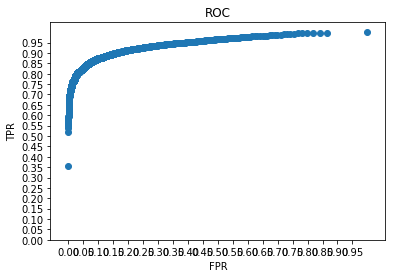

In [72]:
score = predictions_combined
y =labels_combined

roc_x = []
roc_y = []
min_score = min(score)
max_score = max(score)
thr = np.linspace(0.0, 1, 5000)
FP=0
TP=0
N = neg_len
P = pos_len

for thresh in thr:
    for i in range(len(score)):
        if (score[i] >= thresh):
            if (y[i]==1):
                TP = TP + 1
            if (y[i]==0):
                FP = FP + 1
                
    roc_x.append(FP/float(N))
    roc_y.append(TP/float(P))
    FP=0
    TP=0

# fpr_2arch12_9 = roc_x
# tpr_2arch12_9 = roc_y

plt.scatter(roc_x,roc_y)
plt.xticks(np.arange(0, 1.0, step=0.05))
plt.yticks(np.arange(0, 1, step=0.05))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')

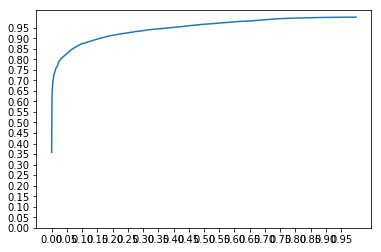

In [73]:
import numpy as np
from scipy import interpolate

# fpr_unique, indices = np.unique(np.array(fpr_2arch12_9), return_index=True)
# tpr_unique =np.array(tpr_2arch12_9)[indices]

fc = interpolate.interp1d(np.flip(np.array(roc_x)), np.flip(np.array(roc_y)), kind=1)
xn =np.arange(0.00,1,0.001)
yn = fc(xn)

fpr_2arch12_1=xn
tpr_2arch12_20=yn

plt.plot(xn,yn)
plt.xticks(np.arange(0, 1.0, step=0.05))
plt.yticks(np.arange(0, 1, step=0.05))
plt.show()